In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
import seaborn as sns

In [5]:
df=sns.load_dataset('iris')

In [7]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
#independent feature and dependent features
X=df.iloc[:,:-1]
y=iris.target

In [9]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42,stratify=y)

In [10]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [11]:
from sklearn.tree import DecisionTreeClassifier  

treemodel=DecisionTreeClassifier(max_depth=None)

treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.25, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginic

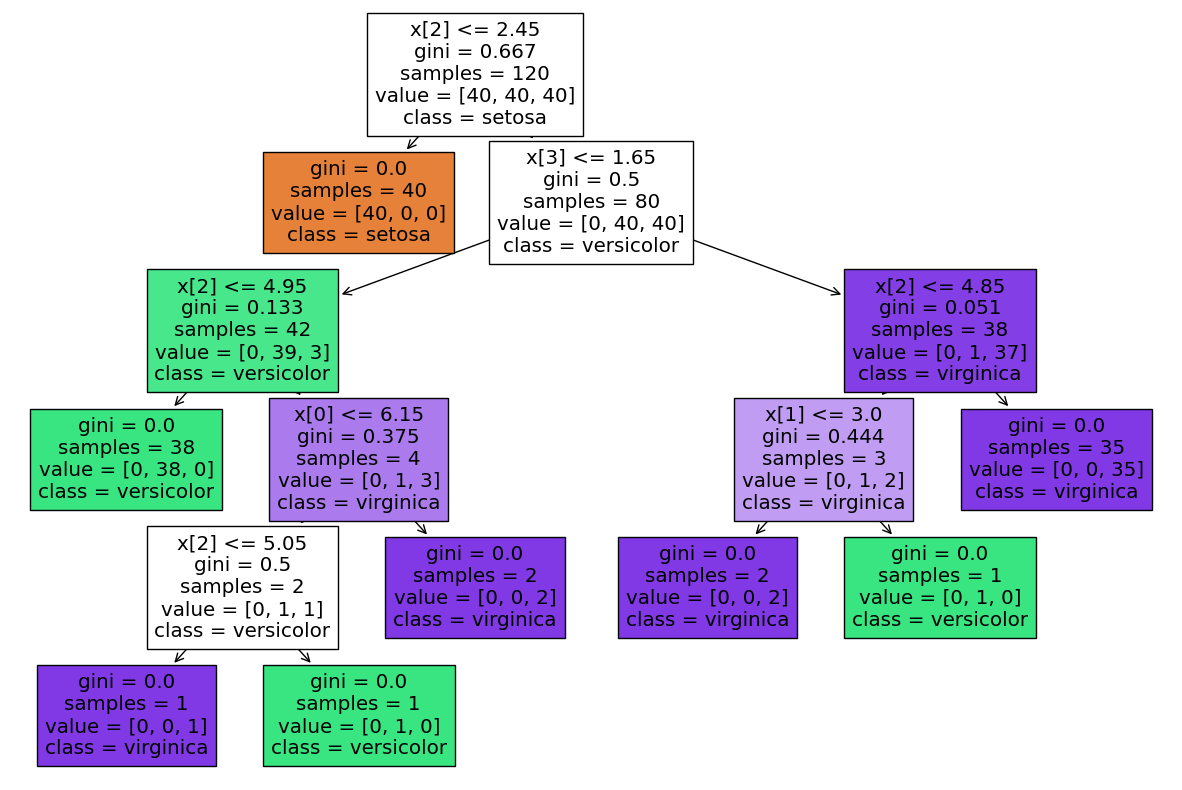

In [12]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True,class_names=list(iris.target_names) )

In [13]:
y_pred=treemodel.predict(X_train)
score=accuracy_score(y_pred,y_train)
score

1.0

In [14]:
y_pred=treemodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
score

0.9333333333333333

In [15]:
from sklearn.metrics import accuracy_score,classification_report


In [16]:
## Preprunning
parameter={
 'criterion':['gini','entropy'],
 'min_samples_split':[20,30,40], 
  'max_depth':[1,2,3,4,5],
    'min_samples_leaf':[10,20,30]
    
    
}

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [19]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [20, 30, 40]},
             scoring='accuracy')

In [20]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 30,
 'min_samples_split': 20}

In [21]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=30, min_samples_split=20)

In [22]:
cv.best_score_

0.95

In [23]:
treemodel=DecisionTreeClassifier(max_depth=2, min_samples_leaf=30, min_samples_split=20)

In [24]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=30, min_samples_split=20)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica')]

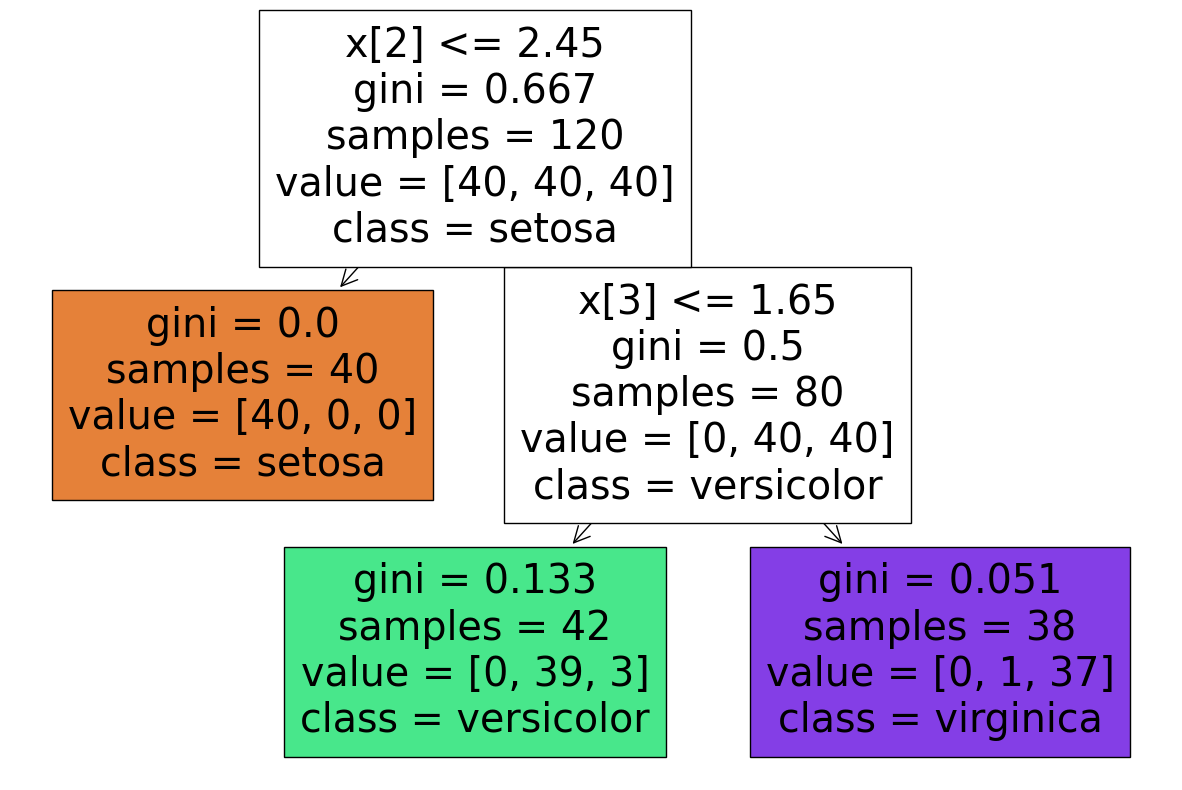

In [25]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True, class_names=list(iris.target_names))

In [26]:
y_pred=treemodel.predict(X_train)
score=accuracy_score(y_pred,y_train)
score

0.9666666666666667

In [27]:
y_pred=treemodel.predict(X_test)
score=accuracy_score(y_pred,y_test)
score

0.9333333333333333

In [128]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

